<a href="https://colab.research.google.com/github/andres123o/Predicting_Credit_Risk/blob/main/Predicting_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*English is not my mother tongue, excuse me for my grammar*

# Credit Risk

The origin of the data is unknown, the owners do not describe its origin and there is no description, but dataSet is fine to create a model for practice.
(https://www.kaggle.com/datasets/essouvenirsama/credit-risk-dataset)

## Context

The main goal is create a model that classifies the credit risk of the people who request a loan with the banck according to age of person, annual income, type of homeownership, lenght of employment in year, purpose of the loan, The grade of the loan,  the amount of the loan, interest rate of the loan, percentage of the person's annual income that loan represents, whether the person has had a deafult in the past, the lenght of the person's credit history in year.


## ML Method
- We will scaling data for better performance
- Before building model we will use PCA for dimensionality
- In this project we will use Logistic Regression

## Attributes

- person_age: The age of the person applying for the loan.
- person_income: The annual income of the person.
- person_home_ownership: The type of home ownership of the person (RENT = Rent, OWN = Own, MORTGAGE = Mortgage).
- person_emp_length: The length of employment of the person in years.
- loan_intent: The purpose of the loan (PERSONAL = Personal, EDUCATION = Education, MEDICAL = Medical, VENTURE = Venture, HOMEIMPROVEMENT = Home improvement, DEBTCONSOLIDATION = Debt consolidation).
- loan_grade: The grade of the loan, which is an assessment of the credit risk of the borrower.
- loan_amnt: The amount of the loan requested.
- loan_int_rate: The interest rate of the loan.
- loan_status: The status of the loan (1 = default, 0 = no default).
- loan_percent_income: The percentage of the person’s annual income that the loan represents.
- cb_person_default_on_file: Whether the person has had a default in the past (Y = Yes, N = No).
- cb_person_cred_hist_length: The length of the person’s credit history in years.

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # Allows create palette from a list of colors
import seaborn as sns
sns.set(style = "whitegrid")

# Import libraries for scalling data and PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Import libraries for building model
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score


print(tf.__version__)

2.15.0


In [ ]:
# Import dataSet from google drive
from google.colab import drive

# link drive
drive.mount('/content/drive')
# link file
ruta = '/content/drive/My Drive/db/credit_risk_dataset.csv'
# Save data
df = pd.read_csv(ruta)

Mounted at /content/drive


# 1. EXPLORATORY DATA ANALYSIS (EDA)

## 1.1 Data Inspectation

In [ ]:
# Show the basic info about the dataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# Show all values in the head of dataSet
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [ ]:
# Check categorical variables (person_home_ownership, loan_intent, loan_grade, cb_person_default_in_file, loan_status)

In [ ]:
# person_home_ownership
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [ ]:
# loan_intent
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [ ]:
# loan_grade
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [ ]:
# cb_person_default_on_fil
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [ ]:
# loan_status
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [ ]:
# Check basic statistics
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [ ]:
# Check if any value is N/A
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Check if any value is duplicated
df.duplicated().sum()

165

** **
- **Note that there are several liers according to the max value, and there are missing values ​​in loan:int_rate.**
- **There are 895 N/A values in person_emp_lenght**
- **There are 3116 N/A values in loan_int_rate**
- **The variable loan_grade provides no information because we don’t have context about it.**
- **There are 165 repeat values**
** **

## 1.2 Data Cleaning and New Features

remove NA values and repeat, drop loan_grade







In [ ]:
# Drop N/A values
df.dropna(inplace = True)

In [ ]:
# Drop repeat values
df.drop_duplicates(inplace = True)

In [ ]:
# Drop loan_grade
df.drop(['loan_grade'], axis = 1, inplace = True)

In [ ]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y                           3  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4

## 1.3 Get discrete and continous features

We need know wich features are discrete or continous for data visualization

In [ ]:
# Divide features by discrete and continous (won't work after PCA)
col_cont = []
col_dis = []

# This secction is taken of the other project by JIESHENDS2020
def divide_feature_types(data):
        '''
        inpute a data frame and output continuous, and discrete feature columns in list format
        '''
        # Initialize
        col_cont=[]
        col_dis=[]
        # loop through and seperate columns
        for c in data.columns:
            if ('person_home_ownership' in c) or ('loan_intent' in c) or ('loan_status' in c) or ('cb_person_default_on_file' in c):
                col_dis.append(c)
            elif (data[c].dtype=='O'):
                col_dis.append(c)
            else:
                col_cont.append(c)
        return col_cont, col_dis

col_cont, col_dis = divide_feature_types(df)
print('Continuous numerical features: ', col_cont)
print('Categorical or discrete features: ', col_dis)

Continuous numerical features:  ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical or discrete features:  ['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file']


## 1.4 Data visualization analysis





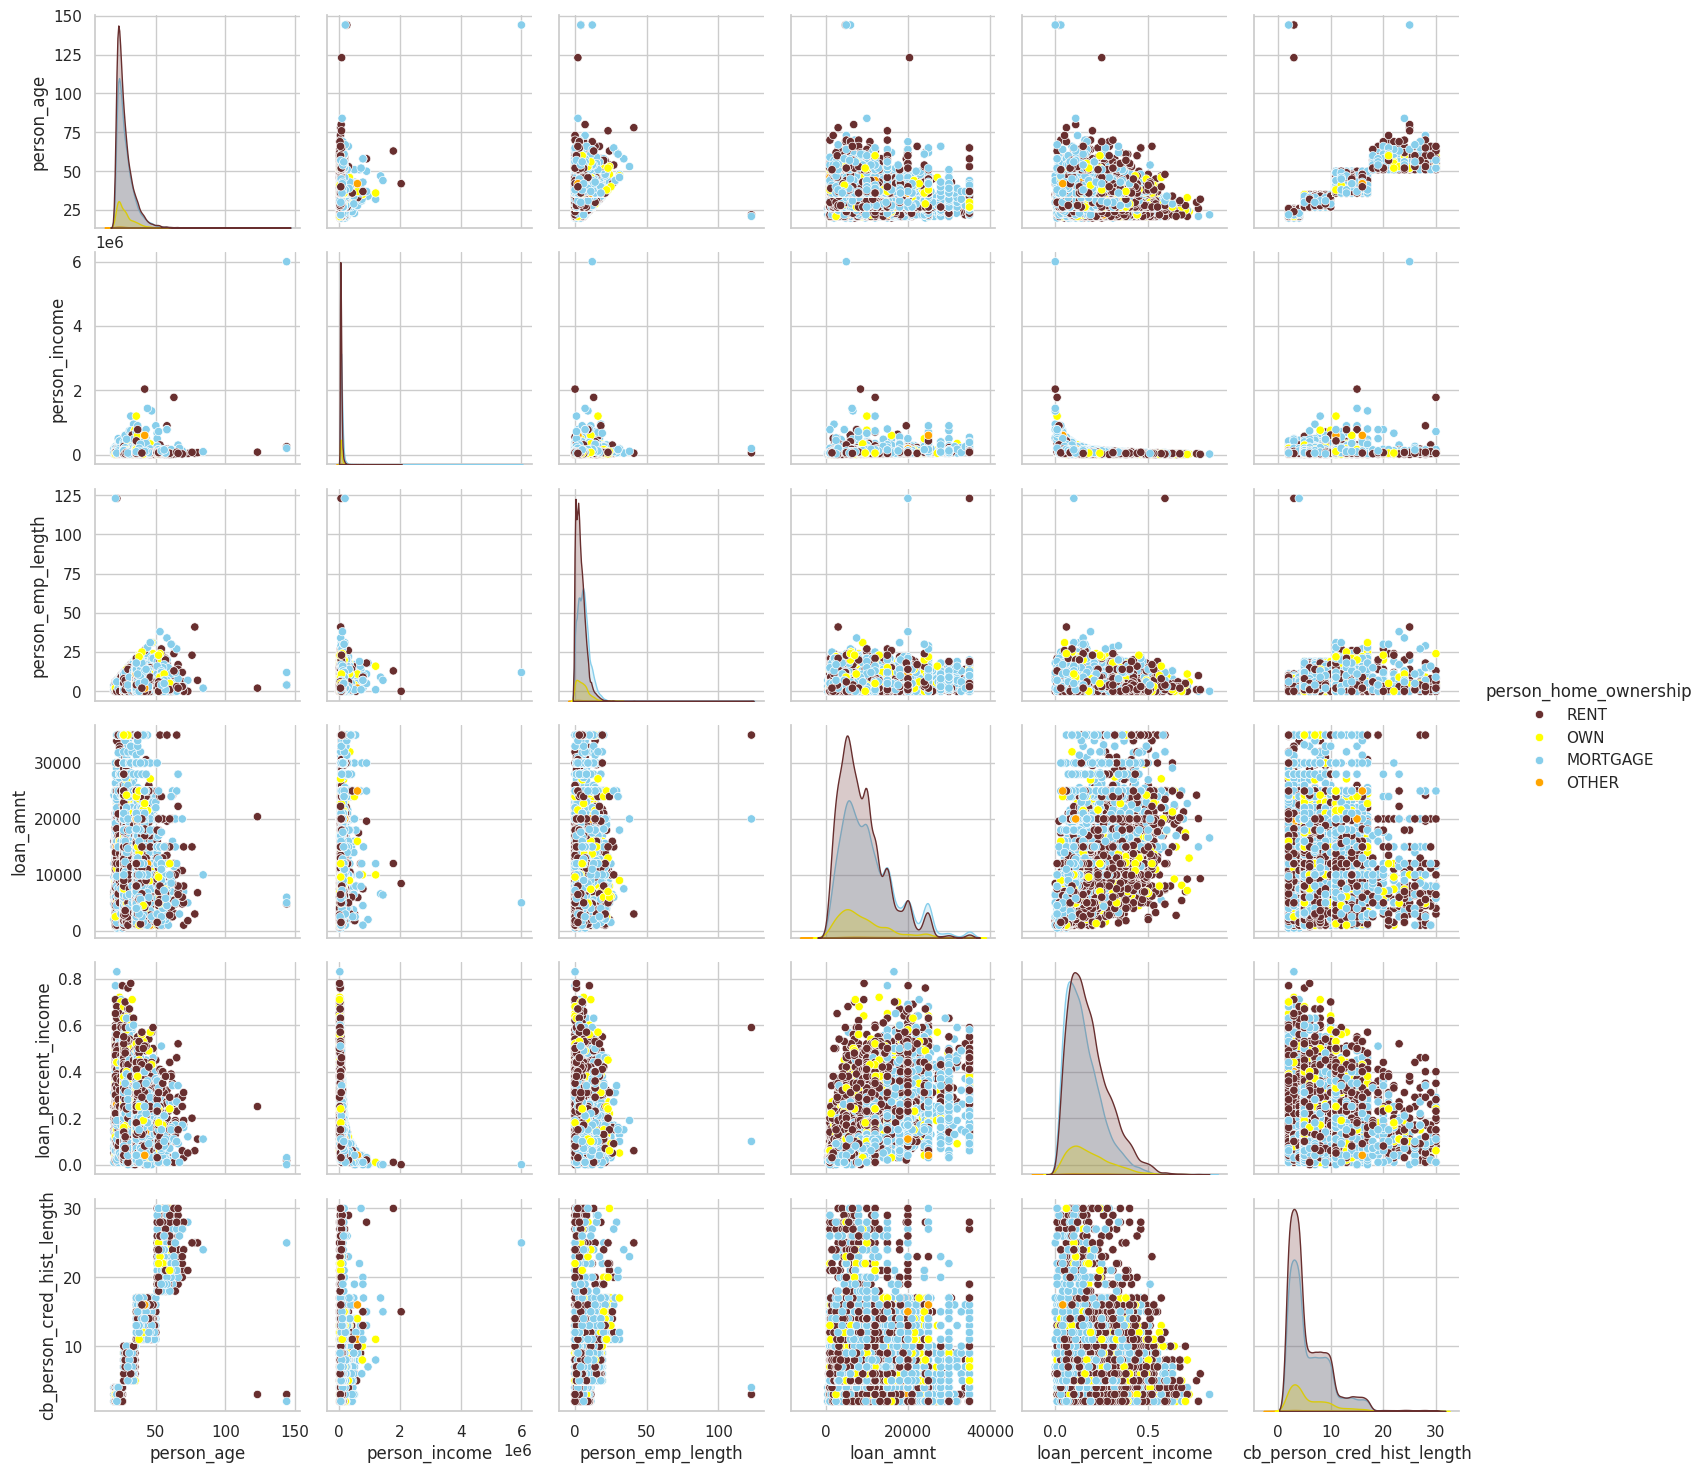

In [ ]:
#  Create a pairplot analyzing the continuous variables and relating them to a discrete variable
col_cont_minus_loan_int_rate = [col for col in col_cont if col != 'loan_int_rate']

to_plot = col_cont_minus_loan_int_rate + ['person_home_ownership']
sns.pairplot(df[to_plot], hue = 'person_home_ownership', palette= (["#682F2F","yellow", 'Skyblue', 'orange']))

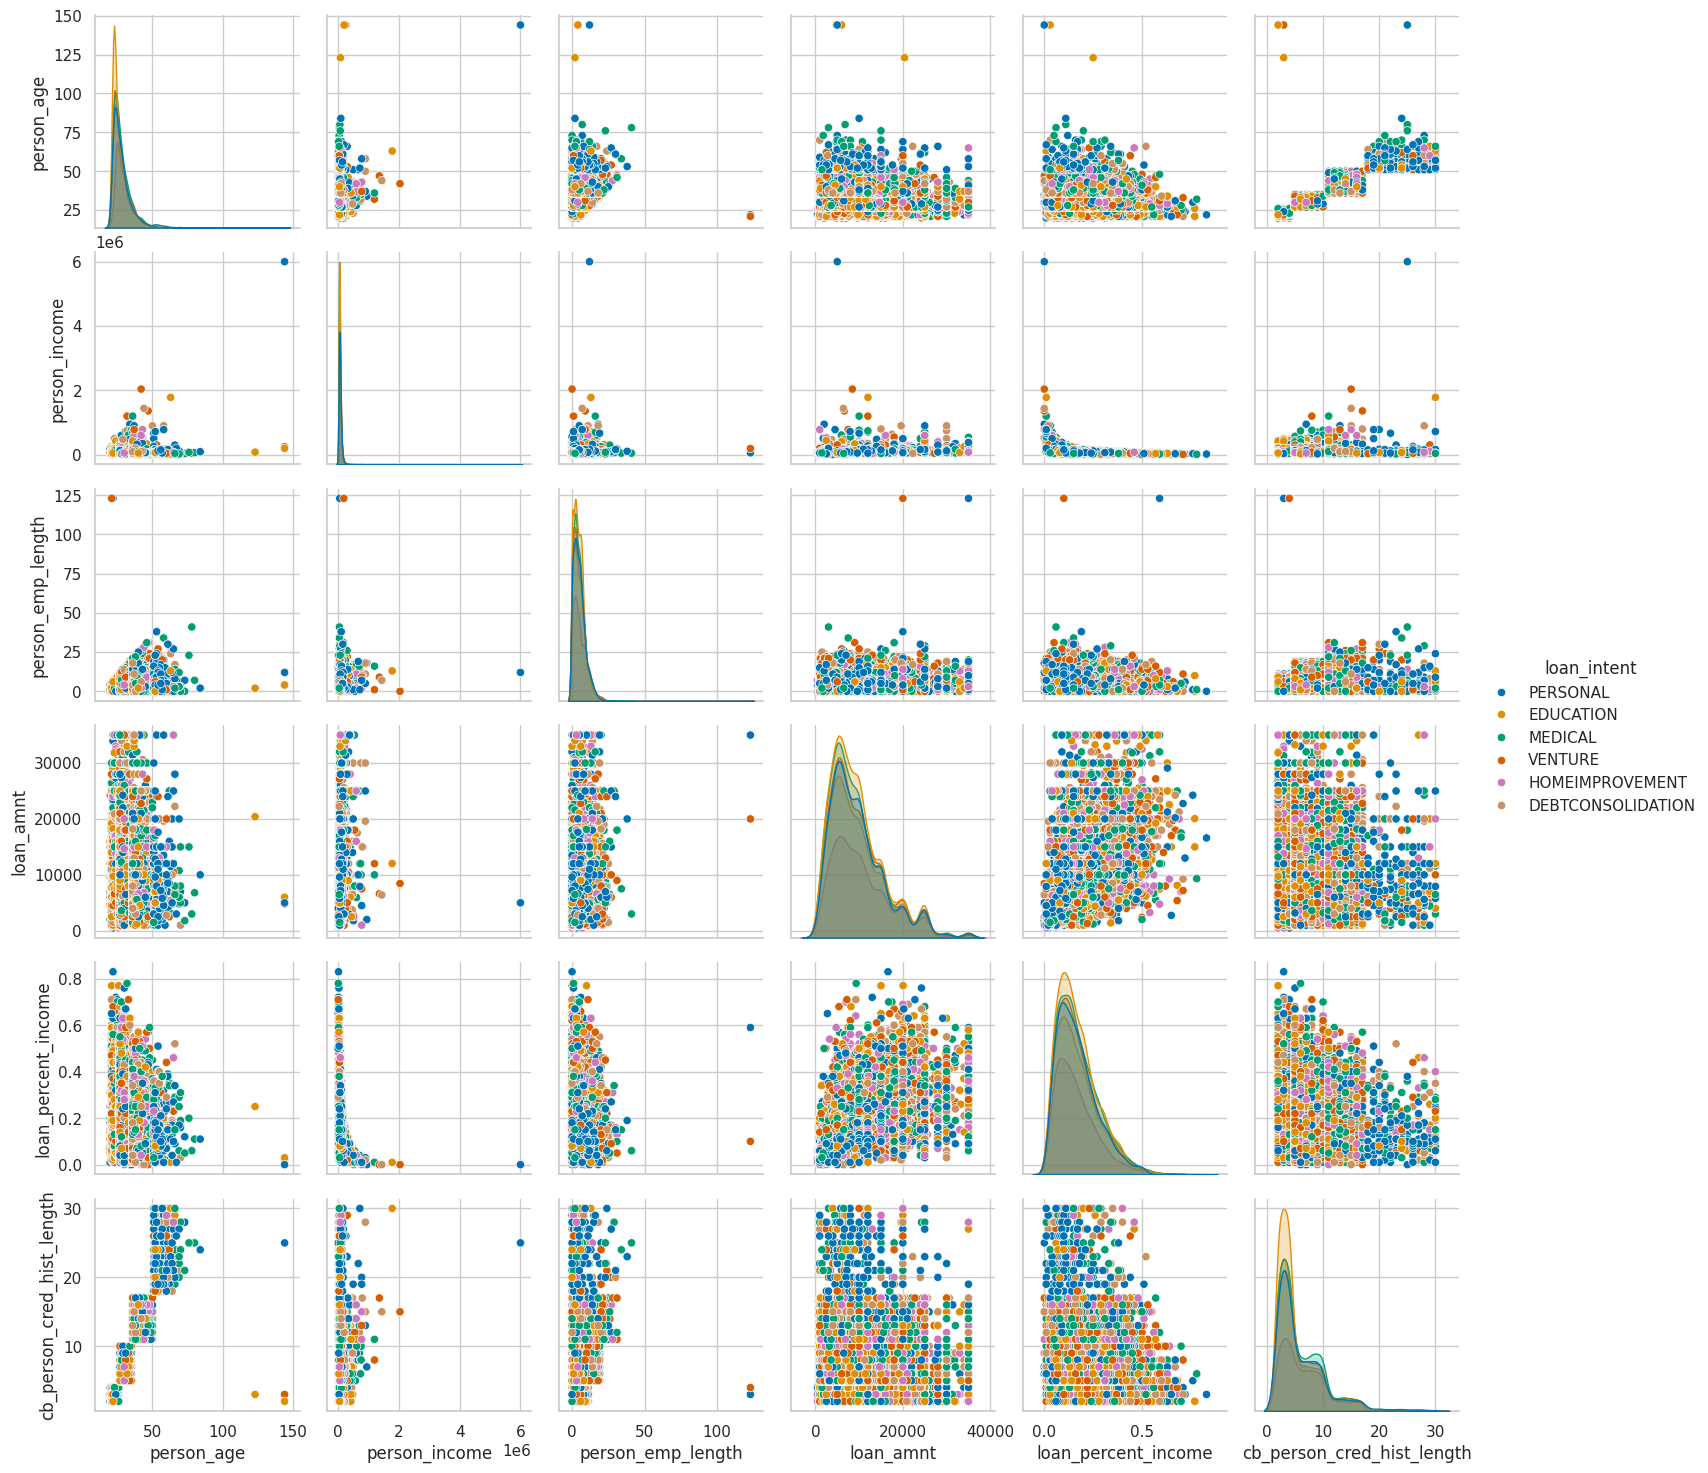

In [ ]:
#  Create a pairplot analyzing the continuous variables and relating them to a discrete variable
col_cont_minus_loan_int_rate = [col for col in col_cont if col != 'loan_int_rate']

to_plot = col_cont_minus_loan_int_rate + ['loan_intent']
sns.pairplot(df[to_plot], hue = 'loan_intent', palette= ('colorblind'))

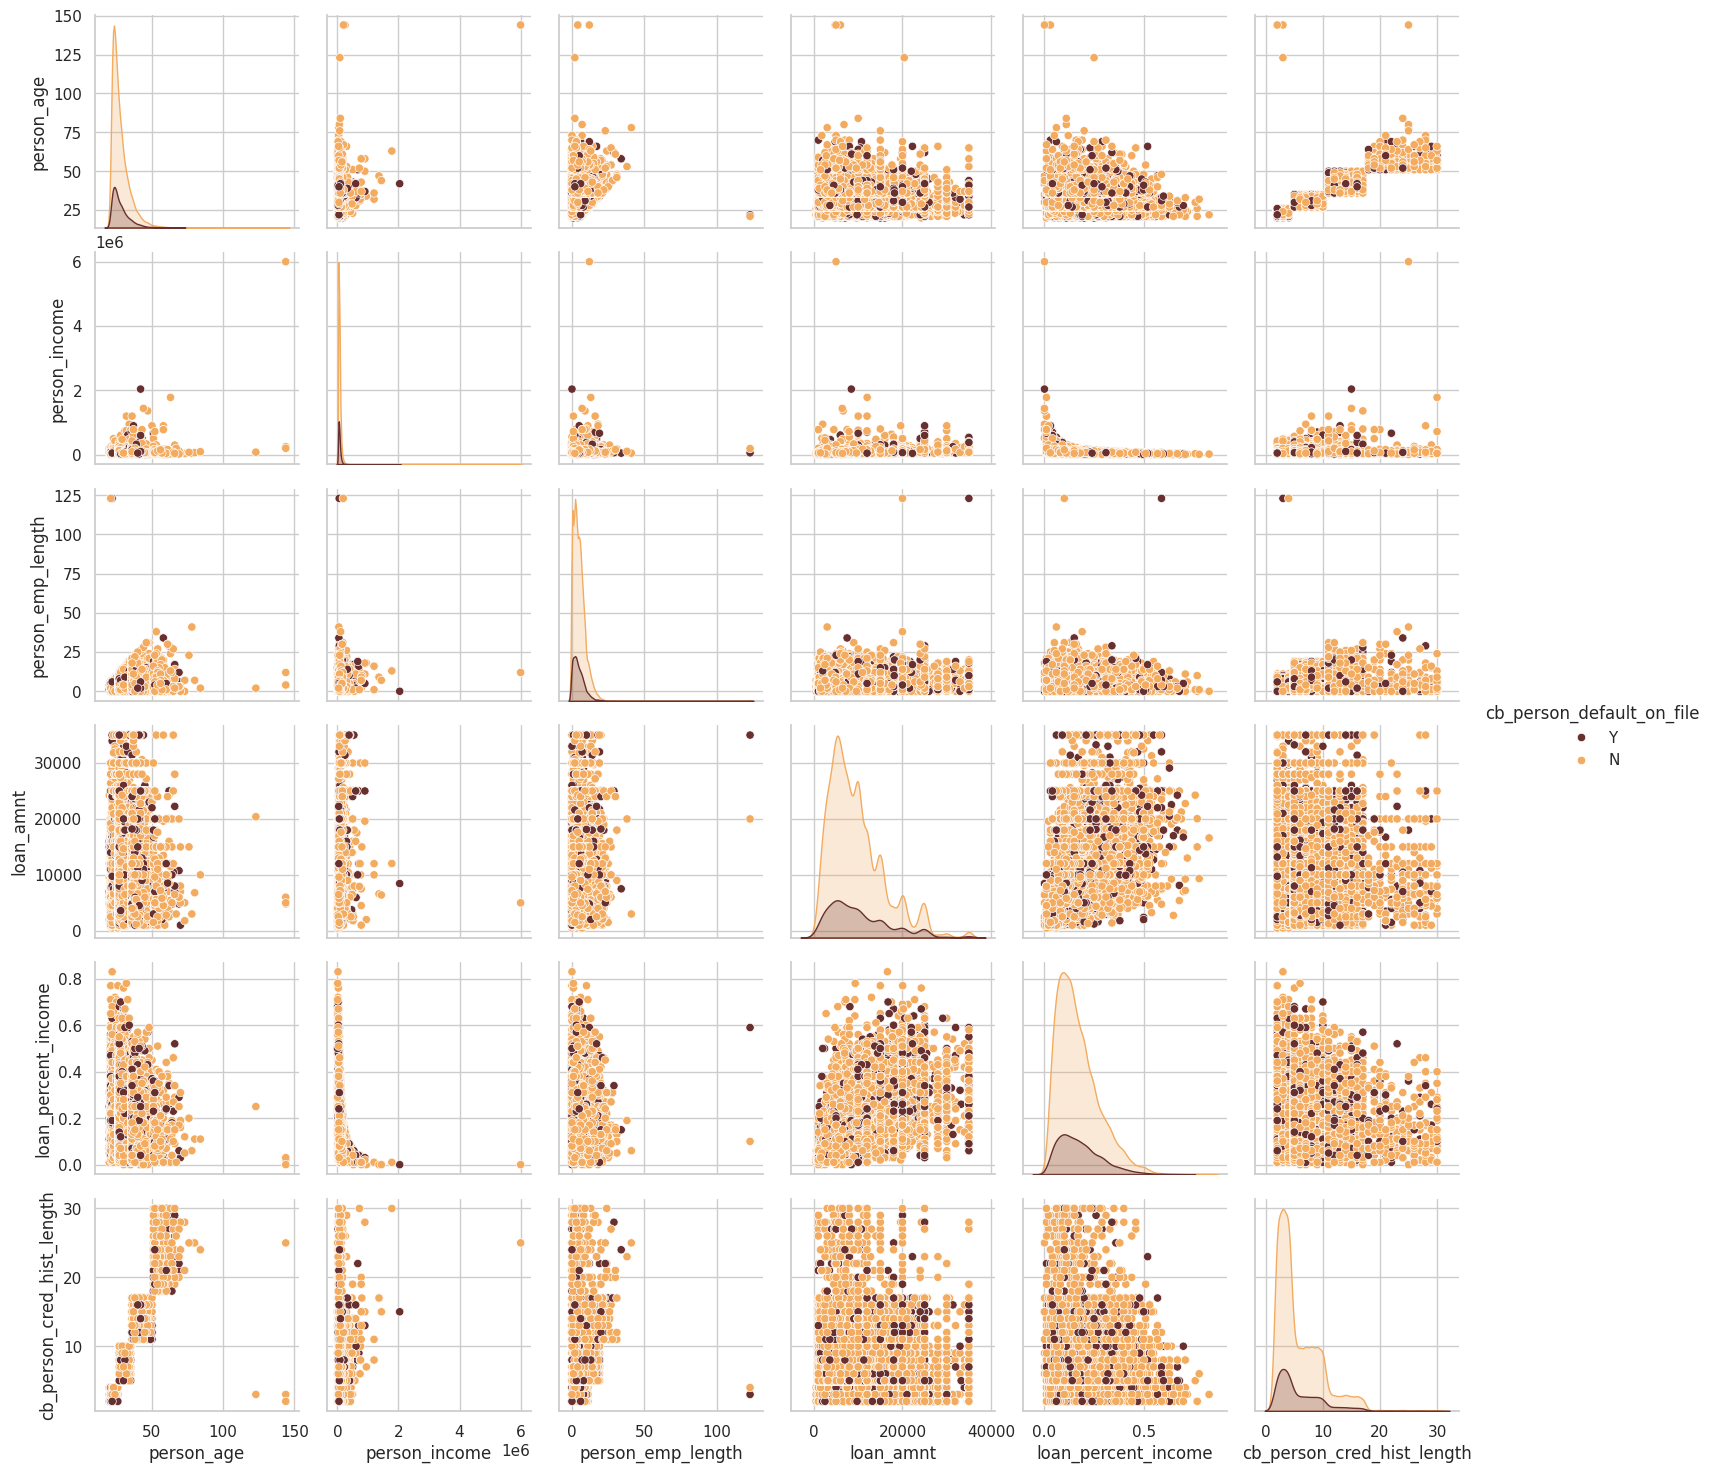

In [ ]:
#  Create a pairplot analyzing the continuous variables and relating them to a discrete variable
col_cont_minus_loan_int_rate = [col for col in col_cont if col != 'loan_int_rate']

to_plot = col_cont_minus_loan_int_rate + ['cb_person_default_on_file']
sns.pairplot(df[to_plot], hue = 'cb_person_default_on_file', palette= (["#682F2F","#F3AB60"]))

<ipython-input-21-3de3985d24e0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


<Axes: >

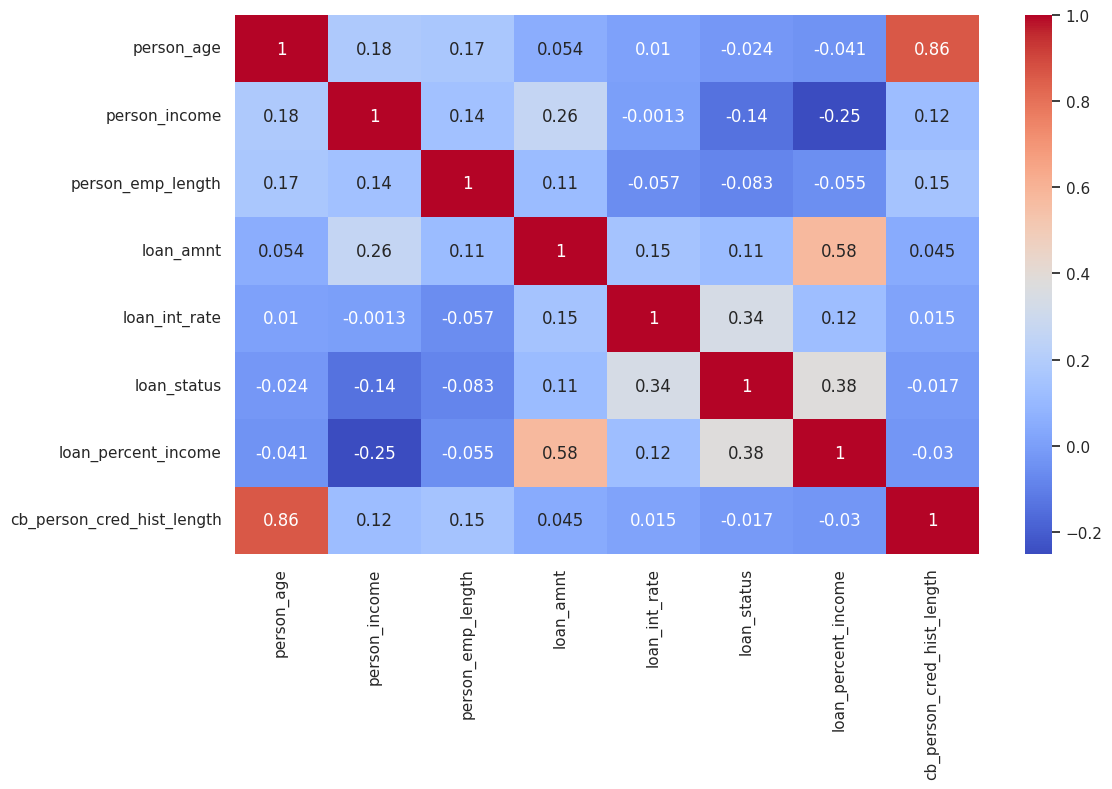

In [ ]:
# Create the correlation matriz
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

** **
-  **We created a pairplot analyzing the continuous variables relating them to a discrete variables, we can see that there are outliers, in years, in income, and person emplyment years, we will have to do data cleaning again, as for the correlation we can see that there is no presence of multicollinearity.**

** **

## 1.2 Data Cleaning and New Features (Repeat step)

Drop outliers in person_age, person_income, person_emp_lenght

In [ ]:
# Drop outliers in person_age
df = df[df['person_age'] < 90]

In [ ]:
# Drop otliers in person_emp_lenght
df = df[df['person_emp_length'] < 60]

## 1.4 Data visualization analysis (Repeat step)


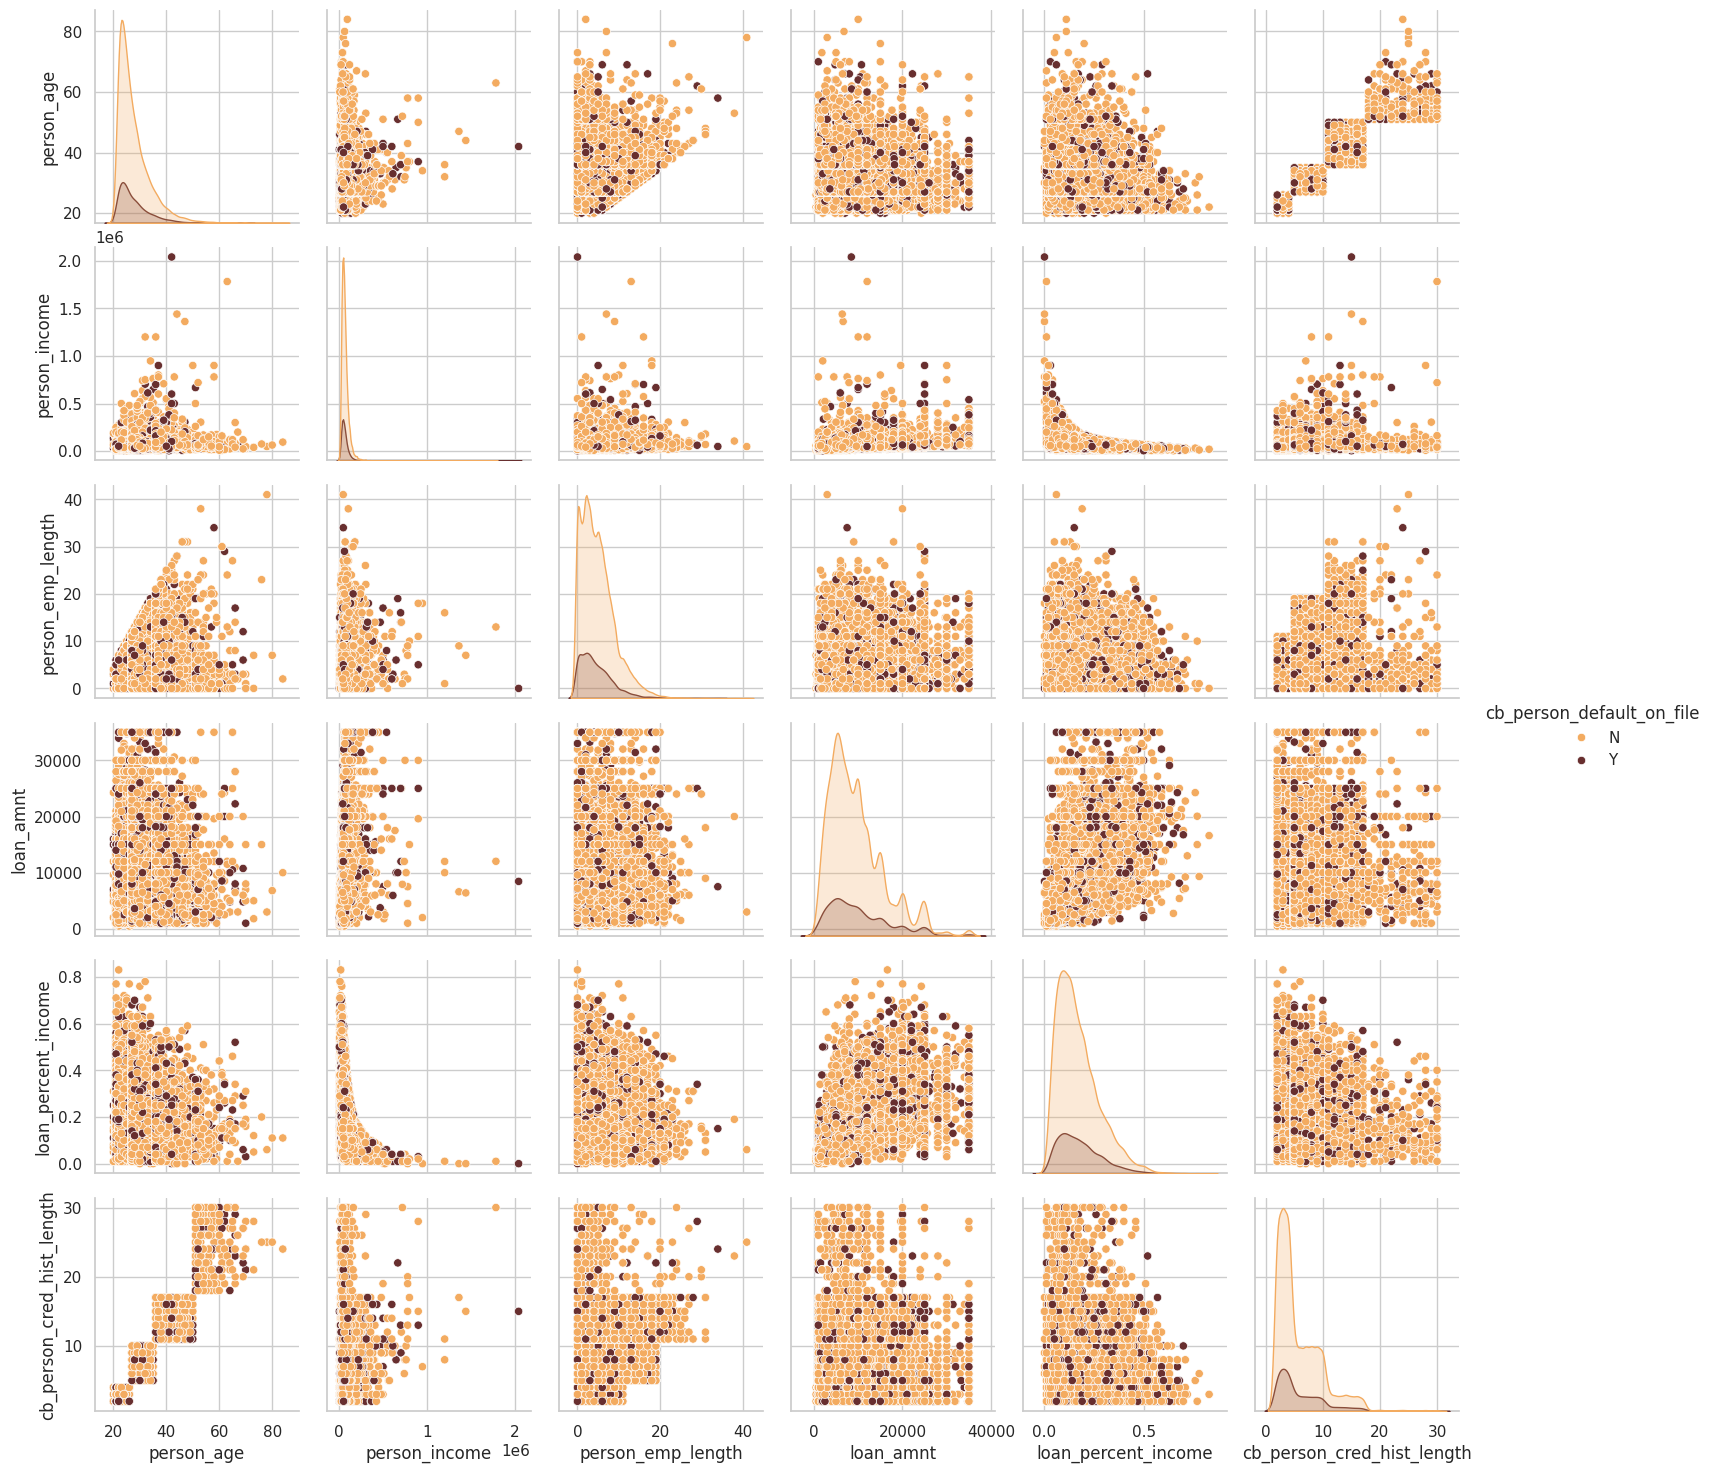

In [ ]:
#  Create a pairplot analyzing the continuous variables and relating them to a discrete variable
col_cont_minus_loan_int_rate = [col for col in col_cont if col != 'loan_int_rate']

to_plot = col_cont_minus_loan_int_rate + ['cb_person_default_on_file']
sns.pairplot(df[to_plot], hue = 'cb_person_default_on_file', palette= (["#F3AB60", "#682F2F"]))

** **
- **Drop the outliers from the data set, now go ahead with data preprocessing**
** **

# 2. DATA PREPROCESSING

### In this section we will scalling data for better perfomance to data, also we will get the dummies for categorical variables.


In [ ]:
# Obtain categorical variables
le = LabelEncoder()

# Transform person_home_ownership
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])

# Transform loan_intent
df['loan_intent'] = le.fit_transform(df['loan_intent'])

# Transform cb_person_defaul_life
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

In [ ]:
dt = df.copy()

In [ ]:
# First, we divide the variables into dependent and independent ones
# The binary variables don't scaling
# The target variable is not scaled because it is binary.

dumi = dt['cb_person_default_on_file'].values
y = dt['loan_status'] # Binary dependient
x = dt.drop(['cb_person_default_on_file', 'loan_status'], axis = 1)

In [ ]:
# Scalling data

# Create data copy
x = x.copy()

# Model
scaler = StandardScaler()

# train model
scaler.fit(x)

# Create new scaler data
x_scaler = pd.DataFrame(scaler.transform(x), columns = x.columns)

In [ ]:
# Join dummi with x variables
x_scaler['cb_person_default_on_file'] = dumi

In [ ]:
x_scaler.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0   -1.088462      -1.103229               0.221743           0.054050   
1   -0.440908      -1.103229              -1.172470          -0.936567   
2   -0.764685      -0.018063               0.918850          -0.193604   
3   -0.602797      -0.233543               0.918850           0.797013   
4   -1.088462      -1.097406               0.221743          -0.688913   

   loan_intent  loan_amnt  loan_int_rate  loan_percent_income  \
0    -0.885060  -1.368191       0.029337            -0.653501   
1     0.271360  -0.657021       0.564820             3.764748   
2     0.271360   4.005094       1.295305             3.388727   
3     0.271360   4.005094       0.998158             3.576737   
4     1.427781  -1.131134      -1.208773             0.756578   

   cb_person_cred_hist_length  cb_person_default_on_file  
0                   -0.940503                          0  
1                   -0.693022                          0  
2                   -0.940503                          0  
3                   -0.445542                          1  
4                   -0.940503                          0

In [ ]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

# 2. PCA - PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This technique is used to simplify the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which can be easier to interpret and visualize.

In [ ]:
# Model
pca = PCA()

# Train model
pca.fit(x_scaler)

# New data PCA_Scales
x_scaler_pca = pca.transform(x_scaler)

In [ ]:
# Convert DataFrame
x_scaler_pca = pd.DataFrame(x_scaler_pca)

In [ ]:
# Now, analyze the variance of data_scaler_pca
var = pca.explained_variance_ratio_

# Show the variance of all features
print(len(var))
print(var)

10
[0.22532263 0.1796727  0.15939205 0.11234702 0.10877222 0.09314089
 0.07688521 0.01965445 0.01331108 0.01150174]


1 componente: 22.53%
2 componente: 40.50%
3 componente: 56.44%
4 componente: 67.67%
5 componente: 78.55%
6 componente: 87.86%
7 componente: 95.55%
8 componente: 97.52%
9 componente: 98.85%
10 componente: 100.00%


<ipython-input-32-f53011fee4df>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r-x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(cum_var, 'r-x', marker='X')


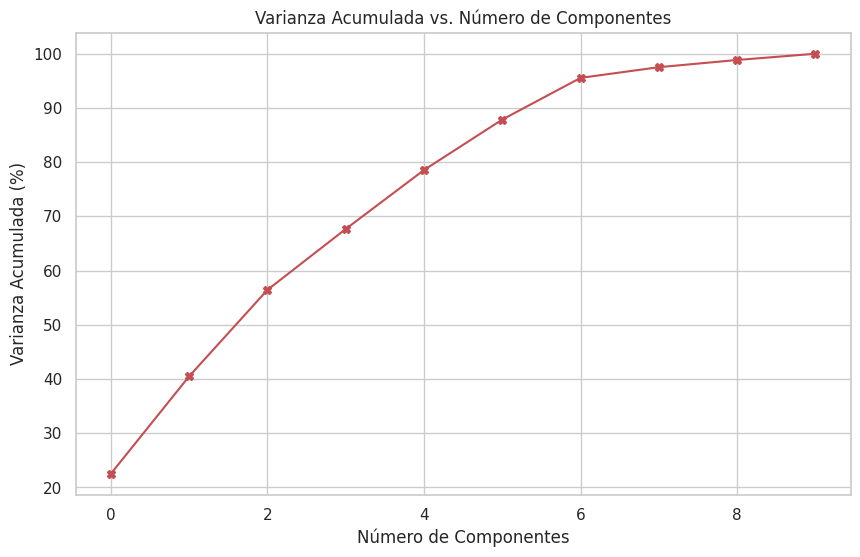

In [ ]:
# Chaeck the best option to reduce the dimensionality, for this we plot the variance with which we will explore the best amount of characteristics that explain the variance of the data.
cum_var = np.cumsum(np.round(var, decimals = 4) * 100) # np.cumsum is the cumulative sum
# Show results
for i, acumulado in enumerate(cum_var, start=1):
    print(f"{i} componente: {acumulado:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(cum_var, 'r-x', marker='X')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada (%)')
plt.title('Varianza Acumulada vs. Número de Componentes')
plt.grid(True)
plt.show()

In [ ]:
x_scaler_pca.head()

0         1         2         3         4         5         6  \
0 -1.805493 -1.266667 -0.282448  0.067289 -0.792153 -0.909012 -0.023975   
1 -1.507392  2.261036 -0.419234 -1.415139 -0.111024 -0.345584 -1.965049   
2 -0.949499  5.374103  0.899183 -0.167407  0.348316  0.400812  0.619997   
3 -0.335852  5.446190  0.864788 -0.637231  0.241536 -0.337408  0.960281   
4 -1.988344 -0.527045 -0.492026 -1.737870  1.043190  0.385971 -0.203659   

          7         8         9  
0 -0.037673 -0.107965  0.193866  
1  2.322493  0.283426  0.377926  
2 -0.486786  0.085564  0.359489  
3 -0.404442 -0.099613 -0.692024  
4  0.633875 -0.056493 -0.059745

In [ ]:
# Drop components provide no information
x_scaler_pca.drop([7, 8,	9], axis = 1, inplace = True)

In [ ]:
x_scaler_pca.head()

0         1         2         3         4         5         6
0 -1.805493 -1.266667 -0.282448  0.067289 -0.792153 -0.909012 -0.023975
1 -1.507392  2.261036 -0.419234 -1.415139 -0.111024 -0.345584 -1.965049
2 -0.949499  5.374103  0.899183 -0.167407  0.348316  0.400812  0.619997
3 -0.335852  5.446190  0.864788 -0.637231  0.241536 -0.337408  0.960281
4 -1.988344 -0.527045 -0.492026 -1.737870  1.043190  0.385971 -0.203659

# 7. BUILDING MODEL - LOGISTIC REGRESSION


In [ ]:
# Separate data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaler_pca, y, test_size = 0.2)

In [ ]:
df['loan_status'].value_counts()

loan_status
0    22308
1     6187
Name: count, dtype: int64

In [ ]:
# Balancing data in loan_status - Oversampling
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 6)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [ ]:
print(len(x_train_sm))
print(len(y_train_sm))

35736
35736


In [ ]:
# Balancing data in loan_status - undersampling
rus = RandomUnderSampler(sampling_strategy='majority')
x_train_us, y_train_us = rus.fit_resample(x_train, y_train)

In [ ]:
print(len(x_train_us))
print(len(y_train_us))

9856
9856


In [ ]:
# Logistic model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid') # The sigmoid function transforms the inputs into values between 0 and 1, which makes it ideal for logistic regression, where we want to predict the probability of an event.
])


# We compile the model, we create the requirements with which we will evaluate the model.
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# Train model
model.fit(
    x_train_sm,
    y_train_sm,
    epochs = 100,
    batch_size = 32,
    verbose = 0
)

In [ ]:
# Evaluate model with test set (x_test and y_test)
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Model accuracy : {accuracy*100:.2f}%')
print(f'Average error committed by the model: {loss:.3f}')

179/179 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7531
Model accuracy : 75.31%
Average error committed by the model: 0.495


In [ ]:
# Prediction with x_train to compare results with y_train
y_pred_train = model.predict(x_train_sm)

1117/1117 [==============================] - 2s 2ms/step


In [ ]:
# y_train_sm original
y_train_sm_original = np.array(y_train_sm)

In [ ]:
# ROC (Receiver Operating Characteristic) curve:
# We create the plot from the predicted data and the actual training data.
# tpr = TRUE POSITIVE RATE (Measures the proportion of positive cases that are correctly classified as positive by a model)
# fpr = FALSE POSITIVE RATE (Measures the proportion of negative cases that are incorrectly classified as positive by a model).

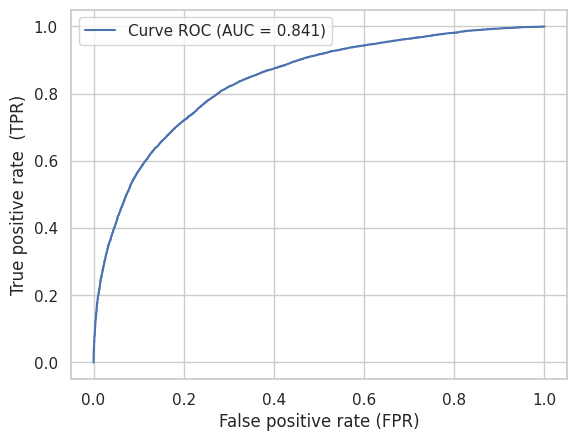

An AUC of 0.5 indicates that the model is no better than random at distinguishing between classes.
An AUC of 1 indicates that the model is perfect at distinguishing between classes.


In [ ]:
# Curve ROC (Receiver Operating Characteristic)
fpr, tpr, _ = roc_curve(y_train_sm_original, y_pred_train)

# Calculate the area under the ROC curve
auc_score = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label='Curve ROC (AUC = {:.3f})'.format(auc_score))
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate  (TPR)')
plt.legend()
plt.show()

# Show results
print('An AUC of 0.5 indicates that the model is no better than random at distinguishing between classes.')
print('An AUC of 1 indicates that the model is perfect at distinguishing between classes.')

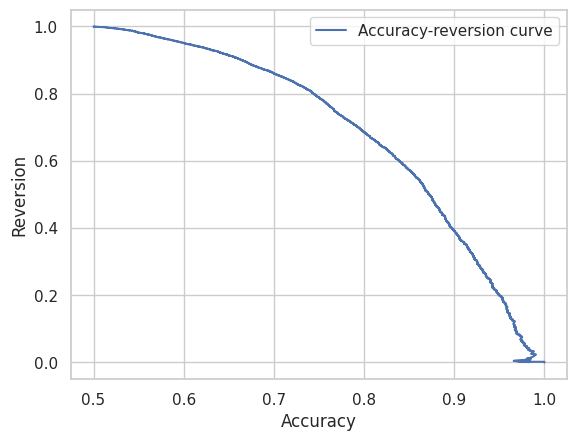

An ideal model would have a precision-recall curve that approaches the upper right corner


In [ ]:
# Calculate accuracy and revocation
precision, recall, _ = precision_recall_curve(y_train_sm_original, y_pred_train)


# Plot
plt.plot(precision, recall, label='Accuracy-reversion curve')
plt.xlabel('Accuracy')
plt.ylabel('Reversion')
plt.legend()
plt.show()

# Precision: It focuses on the accuracy of positive predictions. It measures how well the model avoids making incorrect positive predictions.
# Recall: It focuses on the completeness of positive predictions. It measures how well the model captures all positive cases.
# The main difference between precision and recall lies in their focus:
# Precision: It focuses on the accuracy of positive predictions. It measures how well the model avoids making incorrect positive predictions.
# Recall: It focuses on the completeness of positive predictions. It measures how well the model captures all positive cases.
# In other words, precision cares about how many of the positive predictions are actually correct, while recall cares about how many of the positive cases are actually identified.
print('An ideal model would have a precision-recall curve that approaches the upper right corner')

In [ ]:
# Create the confusion matrix

confusion_matrix = confusion_matrix(y_train_sm, y_pred_train > 0.5)

# Print the confusion matrix
print(confusion_matrix)

[[13458  4410]
 [ 4062 13806]]


In [ ]:
print('_________________________________________________________________________________________________')
print('13,377: Cases that the model predicted as positive and are actually positive (True positives).')
print('4,440: Cases that the model predicted as positive but are actually negative (False positives).')
print('3,941: Cases that the model predicted as negative but are actually positive (False negatives).')
print('13,876: Cases that the model predicted as negative and are actually negative (True negatives)')
print('_________________________________________________________________________________________________')

_________________________________________________________________________________________________
13,377: Cases that the model predicted as positive and are actually positive (True positives).
4,440: Cases that the model predicted as positive but are actually negative (False positives).
3,941: Cases that the model predicted as negative but are actually positive (False negatives).
13,876: Cases that the model predicted as negative and are actually negative (True negatives)
_________________________________________________________________________________________________


In [ ]:
y_pred_binario = model.predict(x_test) > 0.5

179/179 [==============================] - 0s 1ms/step


In [ ]:
f1 = f1_score(y_test, y_pred_binario, average='binary')  # 'binary' para clases desequilibradas
print(f"F1-score: {f1}")

F1-score: 0.580875781948168


# The model has an acceptable performance for credit risk prediction.